In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [68]:
df = pd.read_csv('help_required.csv')
df

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,5119,37950,4,0,Qualified Board Member Seats Available,276,The WorldofMoney.org has a five year of a prov...,NaN,1.0,Strengthening Communities,...,February 18 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5121,37958,25,0,Young Adult Tutor (Updated 3/30/11),465,Change your life by changing someone else’s. T...,NaN,3.0,Education,...,March 30 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5137,38099,1,0,Health Insurance Claims Manager,119,Position entails completing mental health clai...,NaN,2.0,Helping Neighbors in Need,...,February 24 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5138,38100,1,0,Health Insurance Claims Manager,236,Position entails completing mental health clai...,NaN,1.0,Strengthening Communities,...,February 24 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5150,38237,25,0,TimeBanksNYC: THE GREAT EXCHANGE,3334,Join us at the largest timebanking event in Ne...,y,2.0,Helping Neighbors in Need,...,June 12 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,5641,50194,1,0,Administrative Intern,262,NYLAG is currently looking for administrative ...,NaN,2.0,Helping Neighbors in Need,...,November 15 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,5640,50193,3,0,Volunteer for NYLAG's Food Stamps Project,197,"Volunteers needed to file for fair hearings, d...",NaN,2.0,Helping Neighbors in Need,...,November 15 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,5218,38711,10,0,Iridescent Science Studio Open House Volunteers,113,Come out to the South Bronx to help us hold ou...,NaN,1.0,Strengthening Communities,...,April 13 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,5541,47820,1,0,French Translator,145,Volunteer needed to translate written material...,NaN,2.0,Helping Neighbors in Need,...,September 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [69]:
df.isna().any()

opportunity_id        False
content_id            False
vol_requests          False
event_time            False
title                 False
hits                  False
summary               False
is_priority            True
category_id            True
category_desc          True
amsl                   True
amsl_unit              True
org_title             False
org_content_id        False
addresses_count       False
locality               True
region                False
postalcode             True
primary_loc            True
display_url           False
recurrence_type       False
hours                 False
created_date          False
last_modified_date    False
start_date_date       False
end_date_date         False
status                False
Latitude               True
Longitude              True
Community Board        True
Community Council      True
Census Tract           True
BIN                    True
BBL                    True
NTA                    True
dtype: bool

In [70]:
df.isnull().sum()

opportunity_id          0
content_id              0
vol_requests            0
event_time              0
title                   0
hits                    0
summary                 0
is_priority           551
category_id            43
category_desc          43
amsl                  609
amsl_unit             609
org_title               0
org_content_id          0
addresses_count         0
locality               52
region                  0
postalcode              5
primary_loc           609
display_url             0
recurrence_type         0
hours                   0
created_date            0
last_modified_date      0
start_date_date         0
end_date_date           0
status                  0
Latitude              609
Longitude             609
Community Board       609
Community Council     609
Census Tract          609
BIN                   609
BBL                   609
NTA                   609
dtype: int64

In [71]:
#dropping all columns which have null values same as the no of rows in the dataset
df.drop(['amsl', 'amsl_unit', 'primary_loc', 'Latitude', 'Longitude', 'Community Board', 'Census Tract', 'BIN', 'BBL', 'NTA'], axis='columns', inplace=True)

In [72]:
df['is_priority'].unique()

array([nan, 'y'], dtype=object)

In [73]:
df = df.fillna('none')

In [74]:
df = df.drop(df.columns[[24]], axis = 1)

In [75]:
df

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,region,postalcode,display_url,recurrence_type,hours,created_date,last_modified_date,start_date_date,end_date_date,status
0,5119,37950,4,0,Qualified Board Member Seats Available,276,The WorldofMoney.org has a five year of a prov...,none,1.0,Strengthening Communities,...,NY,10036.0,/opportunities/5119,ongoing,0,February 18 2011,February 22 2011,February 18 2011,February 18 2012,approved
1,5121,37958,25,0,Young Adult Tutor (Updated 3/30/11),465,Change your life by changing someone else’s. T...,none,3.0,Education,...,NY,10004.0,/opportunities/5121,ongoing,0,February 18 2011,March 30 2011,February 18 2011,March 30 2012,approved
2,5137,38099,1,0,Health Insurance Claims Manager,119,Position entails completing mental health clai...,none,2.0,Helping Neighbors in Need,...,NY,10001.0,/opportunities/5137,ongoing,0,February 24 2011,July 13 2011,February 24 2011,February 24 2012,approved
3,5138,38100,1,0,Health Insurance Claims Manager,236,Position entails completing mental health clai...,none,1.0,Strengthening Communities,...,NY,10001.0,/opportunities/5138,ongoing,0,February 24 2011,February 24 2011,February 24 2011,February 24 2012,approved
4,5150,38237,25,0,TimeBanksNYC: THE GREAT EXCHANGE,3334,Join us at the largest timebanking event in Ne...,y,2.0,Helping Neighbors in Need,...,NY,10003.0,/opportunities/5150,onetime,0,March 01 2011,May 16 2011,June 12 2011,June 12 2011,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,5641,50194,1,0,Administrative Intern,262,NYLAG is currently looking for administrative ...,none,2.0,Helping Neighbors in Need,...,NY,10004.0,/opportunities/5641,ongoing,0,August 16 2011,August 17 2011,August 16 2011,November 15 2012,approved
605,5640,50193,3,0,Volunteer for NYLAG's Food Stamps Project,197,"Volunteers needed to file for fair hearings, d...",none,2.0,Helping Neighbors in Need,...,NY,10004.0,/opportunities/5640,ongoing,0,August 16 2011,August 17 2011,August 16 2011,November 15 2012,approved
606,5218,38711,10,0,Iridescent Science Studio Open House Volunteers,113,Come out to the South Bronx to help us hold ou...,none,1.0,Strengthening Communities,...,NY,10474.0,/opportunities/5218,onetime,0,March 21 2011,March 21 2011,April 13 2011,April 13 2011,approved
607,5541,47820,1,0,French Translator,145,Volunteer needed to translate written material...,none,2.0,Helping Neighbors in Need,...,NY,10001.0,/opportunities/5541,ongoing,0,July 20 2011,August 23 2011,July 20 2011,September 01 2011,approved


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   opportunity_id      609 non-null    int64 
 1   content_id          609 non-null    int64 
 2   vol_requests        609 non-null    int64 
 3   event_time          609 non-null    int64 
 4   title               609 non-null    object
 5   hits                609 non-null    int64 
 6   summary             609 non-null    object
 7   is_priority         609 non-null    object
 8   category_id         609 non-null    object
 9   category_desc       609 non-null    object
 10  org_title           609 non-null    object
 11  org_content_id      609 non-null    int64 
 12  addresses_count     609 non-null    int64 
 13  locality            609 non-null    object
 14  region              609 non-null    object
 15  postalcode          609 non-null    object
 16  display_url         609 no

In [76]:
df[df.duplicated()]

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,region,postalcode,display_url,recurrence_type,hours,created_date,last_modified_date,start_date_date,end_date_date,status


<h2>Questions</h2>
<ul>
    <li>Analyze how many help events were created per month</li>
    <li>Category wise analysis of how many activities are recurring and how many are one time.
(column: recurrence type)</li>
    <li>Analysis of Number of volunteers required vs category_desc</li>
    <li>Appropriate Graphical analysis of Total number of volunteers required per day each day of the
year</li>
</ul>

## Question No 1 

In [77]:
#EDA
#Question 1
df['datetime'] = pd.to_datetime(df['created_date'], dayfirst = True)
day=[]
month=[]
year=[]
for i in df['datetime']:
        day.append(i.day)
        month.append(i.month)
        year.append(i.year)
df['day'] = pd.DataFrame(day)
df['day'] = df['day'].astype(int)
df['month'] = pd.DataFrame(month)
df['month'] = df['month'].astype(int)
df['year'] = pd.DataFrame(year)
df['year'] = df['year'].astype(int)

In [78]:
df

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,hours,created_date,last_modified_date,start_date_date,end_date_date,status,datetime,day,month,year
0,5119,37950,4,0,Qualified Board Member Seats Available,276,The WorldofMoney.org has a five year of a prov...,none,1.0,Strengthening Communities,...,0,February 18 2011,February 22 2011,February 18 2011,February 18 2012,approved,2011-02-18,18,2,2011
1,5121,37958,25,0,Young Adult Tutor (Updated 3/30/11),465,Change your life by changing someone else’s. T...,none,3.0,Education,...,0,February 18 2011,March 30 2011,February 18 2011,March 30 2012,approved,2011-02-18,18,2,2011
2,5137,38099,1,0,Health Insurance Claims Manager,119,Position entails completing mental health clai...,none,2.0,Helping Neighbors in Need,...,0,February 24 2011,July 13 2011,February 24 2011,February 24 2012,approved,2011-02-24,24,2,2011
3,5138,38100,1,0,Health Insurance Claims Manager,236,Position entails completing mental health clai...,none,1.0,Strengthening Communities,...,0,February 24 2011,February 24 2011,February 24 2011,February 24 2012,approved,2011-02-24,24,2,2011
4,5150,38237,25,0,TimeBanksNYC: THE GREAT EXCHANGE,3334,Join us at the largest timebanking event in Ne...,y,2.0,Helping Neighbors in Need,...,0,March 01 2011,May 16 2011,June 12 2011,June 12 2011,approved,2011-03-01,1,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,5641,50194,1,0,Administrative Intern,262,NYLAG is currently looking for administrative ...,none,2.0,Helping Neighbors in Need,...,0,August 16 2011,August 17 2011,August 16 2011,November 15 2012,approved,2011-08-16,16,8,2011
605,5640,50193,3,0,Volunteer for NYLAG's Food Stamps Project,197,"Volunteers needed to file for fair hearings, d...",none,2.0,Helping Neighbors in Need,...,0,August 16 2011,August 17 2011,August 16 2011,November 15 2012,approved,2011-08-16,16,8,2011
606,5218,38711,10,0,Iridescent Science Studio Open House Volunteers,113,Come out to the South Bronx to help us hold ou...,none,1.0,Strengthening Communities,...,0,March 21 2011,March 21 2011,April 13 2011,April 13 2011,approved,2011-03-21,21,3,2011
607,5541,47820,1,0,French Translator,145,Volunteer needed to translate written material...,none,2.0,Helping Neighbors in Need,...,0,July 20 2011,August 23 2011,July 20 2011,September 01 2011,approved,2011-07-20,20,7,2011


In [80]:
df['month'].unique()

array([2, 3, 4, 5, 6, 7, 8, 9, 1])

In [86]:
event_month = df.groupby('month').count()
event_month['opportunity_id']

month
1     66
2     54
3     82
4     74
5     44
6     80
7     48
8    104
9     57
Name: opportunity_id, dtype: int64

## Question No 2

In [87]:
#Question 2
df['recurrence_type'].unique()

array(['ongoing', 'onetime'], dtype=object)

In [89]:
category = df['recurrence_type'].value_counts()
category

ongoing    467
onetime    142
Name: recurrence_type, dtype: int64

## Question No 3

In [90]:
#Question 3
df['category_desc'].unique()


array(['Strengthening Communities', 'Education',
       'Helping Neighbors in Need', 'Environment', 'Health', 'none',
       'Emergency Preparedness'], dtype=object)

In [117]:
volunteer_category = df.groupby('category_desc')
volunteer_category['vol_requests'].sum()

category_desc
Education                     4634
Emergency Preparedness        2428
Environment                   1004
Health                        2326
Helping Neighbors in Need     7024
Strengthening Communities    31185
none                          1048
Name: vol_requests, dtype: int64

## Question No 4

In [118]:
#Question 4
date_sort = df.sort_values(by = ['month', 'day'])
date_sort

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,hours,created_date,last_modified_date,start_date_date,end_date_date,status,datetime,day,month,year
66,4953,36698,12,0,Event Planning Volunteer (Red Cross Clubs),102,American Red Cross Clubs are student groups at...,none,none,none,...,0,January 03 2011,February 14 2011,January 03 2011,February 10 2011,approved,2011-01-03,3,1,2011
68,4952,36697,1,0,Deliver a Winter Package and Visit with an iso...,181,Warm up the day of a senior! Deliver a packa...,none,2.0,Helping Neighbors in Need,...,0,January 03 2011,January 06 2011,January 30 2011,January 30 2011,approved,2011-01-03,3,1,2011
64,4961,36746,5,0,Education Nonprofit Seeks Recruitment Volunteers,304,"Blue Engine recruits, selects, trains, and sup...",none,3.0,Education,...,0,January 04 2011,January 06 2011,January 11 2011,June 30 2011,approved,2011-01-04,4,1,2011
65,4960,36730,25,0,"Mentors, Register to Attend A Breakfast Orient...",35,Attend a Breakfast Orientation to learn more a...,none,1.0,Strengthening Communities,...,0,January 04 2011,January 19 2011,January 04 2011,January 24 2011,approved,2011-01-04,4,1,2011
67,4959,36726,1,0,Outreach and Marketing Assistant,220,NIP is looking for a person who would like to ...,none,1.0,Strengthening Communities,...,0,January 04 2011,March 23 2011,April 04 2011,March 23 2012,approved,2011-01-04,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,5776,52834,20,0,ACADEMIC TUTORING OPPORTUNITIES AT HARLEM RBI:...,12,We are currently in the process of recruiting ...,none,3.0,Education,...,0,September 23 2011,September 26 2011,September 23 2011,June 10 2012,approved,2011-09-23,23,9,2011
60,5780,52861,20,0,Math Tutor,29,Tutors wanted to help students in grades 3-5 l...,none,3.0,Education,...,0,September 24 2011,September 26 2011,September 24 2011,June 23 2012,approved,2011-09-24,24,9,2011
61,5781,52862,20,0,Literacy Tutor,38,Help students acquire basic English/Language A...,none,3.0,Education,...,0,September 24 2011,September 26 2011,September 24 2011,June 23 2012,approved,2011-09-24,24,9,2011
194,5779,52855,4,0,Latino and African American Youth Serving Program,6,The International Youth Leadership Institute s...,none,3.0,Education,...,0,September 24 2011,September 26 2011,September 24 2011,July 23 2012,approved,2011-09-24,24,9,2011


In [168]:
volunteer_year = df.groupby(['month','day' ])
volunteer_per_day = volunteer_year['vol_requests'].sum()


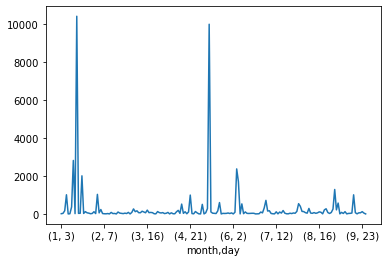

In [170]:
#Plotting required volunteers perday for a given year.
plt.show(volunteer_per_day.plot())

# Classification

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns

In [172]:
#For classification we'll be using a separate dataset.
df_bank = pd.read_csv('bank3.csv')

In [173]:
df_bank

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
595,37,technician,married,secondary,28,no,no,2,0,unknown,no
596,34,management,single,tertiary,404,yes,no,6,0,unknown,no
597,40,unemployed,married,secondary,3430,yes,no,3,0,unknown,no
598,40,management,married,secondary,99,no,no,5,0,unknown,no


In [7]:
df_bank.corr()

,age,balance,campaign,previous
age,1.000000,0.080473,-0.047260,0.008090
balance,0.080473,1.000000,0.011349,-0.011722
campaign,-0.047260,0.011349,1.000000,0.003308
previous,0.008090,-0.011722,0.003308,1.000000


<AxesSubplot:>

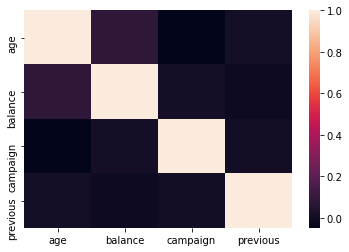

In [8]:
sns.heatmap(df_bank.corr())

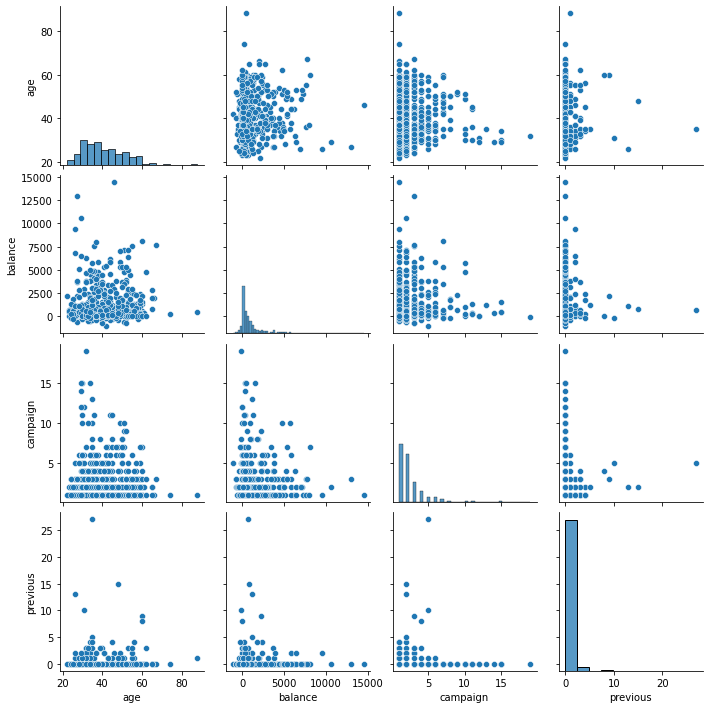

In [58]:
sns.pairplot(df_bank)

In [174]:
feature_cols = ['age', 'balance', 'campaign', 'previous']
X = df_bank[feature_cols]
y = df_bank.deposit

# Decision Tree Classifier

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [196]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [177]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


In [184]:
#trying the unseen data
test = [[33,754,4,0], [44,1040,3,0], [40,122,2,0], [33,1040,4,3], [52,601,2,0], [29,6429,1,2]]
clf.predict(test)

array(['yes', 'yes', 'yes', 'no', 'yes', 'no'], dtype=object)

In [47]:
#Implementing 10 fold cross validation
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.58333333, 0.56666667, 0.55      , 0.58333333, 0.61666667,
       0.56666667, 0.61666667, 0.71666667, 0.41666667, 0.43333333])

In [48]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.57 accuracy with a standard deviation of 0.08


In [65]:
#plotting confusion matrix
confusion_matrix(y_test, y_pred)

array([[16, 75],
       [ 0, 89]], dtype=int64)

In [197]:
#calculating precision and reall
precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
recall = recall_score(y_test, y_pred, average="binary", pos_label="yes")
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.5426829268292683
Recall:  1.0


# SVM

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [186]:
#svm
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [42]:
clf.score(X_test, y_test)

0.5777777777777777

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5777777777777777


In [187]:
#trying the unseen data
test = [[33,754,4,0], [44,1040,3,0], [40,122,2,0], [33,1040,4,3], [52,601,2,0], [29,6429,1,2]]
clf.predict(test)

array(['yes', 'yes', 'yes', 'no', 'no', 'no'], dtype=object)

In [44]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.53333333, 0.55      , 0.55      , 0.6       , 0.56666667,
       0.51666667, 0.63333333, 0.66666667, 0.53333333, 0.46666667])

In [45]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.56 accuracy with a standard deviation of 0.06


In [56]:
confusion_matrix(y_test, y_pred)

array([[33, 58],
       [18, 71]], dtype=int64)

In [194]:
#calculating precision and reall
precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
recall = recall_score(y_test, y_pred, average="binary", pos_label="yes")
 
print('Precision: ',precision)
print('Recall: ',recall)
 


Precision:  0.5503875968992248
Recall:  0.797752808988764


# Conclusion 

<p>
1.In terms of accuracy, we can see that the decision tree classifiers slightly performs better than SVM.<br>
2.Looking at the confusion matrix we can see that Decision tree surpasses svm.<br>
3.However, in precision and recall we got slightly better precision with SVM, but Decision Tree surpassed in Recall.</p>